In [78]:
import netCDF4
import matplotlib.pyplot as plt
import numpy as np
import time as TIME
import datetime
import math as math
%matplotlib inline

In [58]:
url='http://localhost:8080/thredds/dodsC/testAll/fort.61.nc'
#url='http://opendap.renci.org:1935/thredds/dodsC/Test/fort.61.nc'
var_name='zeta'
nc=netCDF4.Dataset(url)
print nc.variables.keys()

[u'time', u'station_name', u'x', u'y', u'zeta']


In [59]:
time=nc.variables['time']
var=nc.variables[var_name]
dtime = netCDF4.num2date(time[:],time.units)
tstart=dtime[0].strftime('%Y-%b-%d')
tstr=nc.comments
#print tstr/
sn=nc.variables['station_name']
lstr=[]
for i in range(sn.shape[0]) :
    temp=sn[i,:].tostring()
    temp=temp.strip('\x00')  # gets rid of some garbage in the strings
    lstr.append(temp)

for p in lstr: print p

% 8651370 Duck Pier                               
% 8652587 Oregon Inlet Marina                     
% 8654467 USCG Hatteras                           
% 8656483 Beaufort                                
% 8658163 Atlantic Coast at J. Mercer Pier at Wrig
% 8659897 Sunset Beach                            


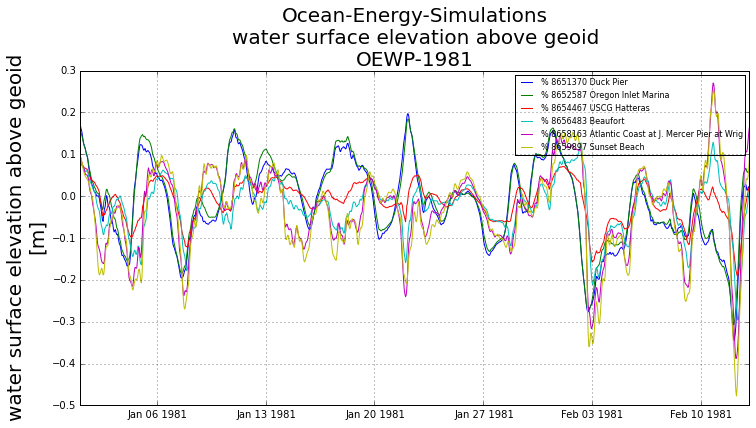

In [60]:
fig = plt.figure(figsize=(12,6), dpi=144)
pc=plt.plot(dtime,var)
plt.title("%s\n%s\n%s" % (nc.title, var.long_name, tstr), fontsize=20)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel("%s\n[%s]" % (var.long_name, var.units), fontsize=20)
plt.legend(lstr, fontsize=8)

[ 0.01449275  0.02898551  0.06280193  0.14782609  0.29758454  0.46570048
  0.647343    0.81642512  0.94396135  1.        ]


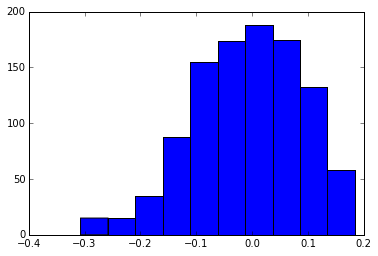

In [130]:
#plt.hist2d
x=h[1][0:10]
y=var[:,1]
h=plt.hist(y);
pdf=h[0]/len(y)
cdf=(np.cumsum(pdf))
print cdf

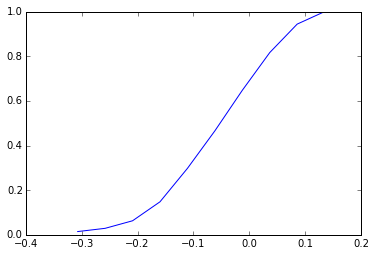

In [131]:
plt.plot(x,cdf)

## Let's build an OPeNDAP url to retrieve NOAA gauge data directly into python

In [142]:
STATION_ID="8651370"
DATUM="MSL"
BEGIN_DATE="19810101 00:00"
END_DATE  ="19820101 00:00"
url=['http://opendap.co-ops.nos.noaa.gov/dods/IOOS/Hourly_Height_Verified_Water_Level?',
     'WATERLEVEL_HOURLY_VFD_PX.DATE_TIME,',
     'WATERLEVEL_HOURLY_VFD_PX.WL_VALUE&',
     'WATERLEVEL_HOURLY_VFD_PX._STATION_ID="%s"&',
     'WATERLEVEL_HOURLY_VFD_PX._DATUM="%s"&',
     'WATERLEVEL_HOURLY_VFD_PX._BEGIN_DATE="%s"&',
     'WATERLEVEL_HOURLY_VFD_PX._END_DATE="%s"'
     ]
url[3] = url[3] % STATION_ID
url[4] = url[4] % DATUM
url[5] = url[5] % BEGIN_DATE
url[6] = url[6] % END_DATE

FullUrl="".join(url)
nc2=netCDF4.Dataset(FullUrl)

In [149]:
print nc2.variables.keys()
wl=nc2.variables['WATERLEVEL_HOURLY_VFD_PX.WL_VALUE']
time=nc2.variables['WATERLEVEL_HOURLY_VFD_PX.DATE_TIME']
print time

[u'WATERLEVEL_HOURLY_VFD_PX.DATE_TIME', u'WATERLEVEL_HOURLY_VFD_PX.WL_VALUE']
<type 'netCDF4.Variable'>
|S1 WATERLEVEL_HOURLY_VFD_PX.DATE_TIME(WATERLEVEL_HOURLY_VFD_PX, maxStrlen64)
    long_name: Converted UTC Date Time Stamp in double quotes (MMM DD YYYY hh:mm(AM or PM)) (E.g. Jul 13 2004 3:48PM)
    comment: The date time stamp unit is in UTC, presented in a 12hr format. You may want to convert to 24 hr format before use. (E.g. 12:06 AM = 0006 UTC, 11:48 PM = 2348 UTC)
unlimited dimensions: 
current shape = (8766, 64)
filling off



In [175]:
print time.name


WATERLEVEL_HOURLY_VFD_PX.DATE_TIME


In [147]:
### the time data returned above is in an almost useless format. 
### it's a huge character array

print np.size(time[:,0])

for i in range(0,np.size(time[:,0])) :
    print i
    temp="".join(time[i,:])
    t.append(TIME.strptime(temp,"%b %d %Y %I:%M%p"))

['J' 'a' 'n' ' ' ' ' '1' ' ' '1' '9' '8' '1' ' ' '1' '2' ':' '0' '0' 'A'
 'M' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '']
8766


KeyboardInterrupt: 

In [41]:
###     

# let's build a datetime vector, assuming hourly data


import datetime 
d = datetime.timedelta(microseconds=-1)
print (d.days, d.seconds, d.microseconds)
print datetime.datetime.utcnow()
start=datetime.datetime.strptime(BEGIN_DATE,"%Y%m%d %H:%M")
end=datetime.datetime.strptime(END_DATE,"%Y%m%d %H:%M")
timevec=[start + datetime.timedelta(hours=x) for x in range(0, 1+24*(end-start).days)]
print start,end, "dt=", end-start, timevec[0], timevec[-1], np.shape(timevec)

RuntimeError: NetCDF: I/O failure

In [28]:
print np.shape(timevec), np.shape(wl)

(8761,) (8766,)


In [29]:
print 365*24+1

8761


In [154]:
x = np.arange(10)

In [155]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [158]:
print x[-2]

8


In [159]:
print type(x)

<type 'numpy.ndarray'>


In [166]:
t0=time[100,:]; print t0

['J' 'a' 'n' ' ' ' ' '1' ' ' '1' '9' '8' '1' ' ' '1' '2' ':' '0' '0' 'A'
 'M' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '']
